In [2]:
%config Completer.use_jedi = False

In [1]:
import numpy as np

In [3]:
np.random.seed(10) # 재현 가능성을 위한 시드 값

x1 = np.random.randint(10, size=4) # 1차원 배열
x1

array([9, 4, 0, 1])

In [4]:
x2 = np.random.randint(10, size=(4,5)) # 2차원 배열
x2

array([[9, 0, 1, 8, 9],
       [0, 8, 6, 4, 3],
       [0, 4, 6, 8, 1],
       [8, 4, 1, 3, 6]])

In [5]:
x3 = np.random.randint(10, size=(2,3,4)) # 3차원 배열
x3

array([[[5, 3, 9, 6],
        [9, 1, 9, 4],
        [2, 6, 7, 8]],

       [[8, 9, 2, 0],
        [6, 7, 8, 1],
        [7, 1, 4, 0]]])

In [6]:
x2_sub = x2[:2, :2]
x2_sub

array([[9, 0],
       [0, 8]])

In [7]:
x2_sub[0,0] = 0
x2_sub

array([[0, 0],
       [0, 8]])

In [8]:
x2

array([[0, 0, 1, 8, 9],
       [0, 8, 6, 4, 3],
       [0, 4, 6, 8, 1],
       [8, 4, 1, 3, 6]])

## 왜 바뀌지???

실제 데이터가 손상되어 버림, 카피 된 것이 아니라, 주소를 전달하는 방식이기 때문  
카피를 확실히 뜨는게 안전하다!

In [9]:
x2_sub_copy = x2[:2,:2].copy()
x2_sub_copy

array([[0, 0],
       [0, 8]])

In [10]:
x2_sub_copy[0,0] = 1000
x2_sub_copy

array([[1000,    0],
       [   0,    8]])

### 배열의 재구조화

In [11]:
grid_before = np.arange(1,10)
grid_before

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.reshape(grid_before, (9,1))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [13]:
grid_before.reshape(3, 3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

(Advanced)

1차원 배열을 2차원 행 매트릭스 또는 열 매트릭스로 재구조화

##### 한 점에서 다른 점들 간의 거리를 모두 재보고 싶다.

In [15]:
x = np.array([1,2,3,4,5]) #[5,]
display(x)

array([1, 2, 3, 4, 5])

In [16]:
#newaxis : 새로운 축, 지금은 행에 넣겠다는 뜻
display(x[np.newaxis, :])

array([[1, 2, 3, 4, 5]])

In [18]:
#reshape 써도 됨
display(x[:, np.newaxis]) 

array([[1],
       [2],
       [3],
       [4],
       [5]])

### <font color=red> 배열 연결하기</font>

In [20]:
x = np.array([1,2,3])
y = np.array([3,2,1])
np.concatenate([x,y])

array([1, 2, 3, 3, 2, 1])

In [21]:
grid = np.array([
    [1,2,3],
    [4,5,6]
])

In [22]:
grid

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
np.concatenate([grid, grid], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [25]:
np.concatenate([grid,grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [28]:
x = np.array([1,2,3])
y = np.array([
    [9,8,7],
    [6,5,4]
])
display(x)
display(y)

array([1, 2, 3])

array([[9, 8, 7],
       [6, 5, 4]])

In [30]:
np.vstack([x,y])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [35]:
z = np.array([
        [99],
        [99]
    ])

display(grid)
display(z)

np.hstack([z, grid])

array([[1, 2, 3],
       [4, 5, 6]])

array([[99],
       [99]])

array([[99,  1,  2,  3],
       [99,  4,  5,  6]])

### 배열 분할하기

In [36]:
x = [1,2,3,99,3,2,1]
x1, x2, x3 = np.split(x, [3,5])

display(x1)
display(x2)
display(x3)

array([1, 2, 3])

array([99,  3])

array([2, 1])

In [39]:
grid = np.arange(25).reshape((5,5))

upper, middle, lower = np.vsplit(grid, [1,3])

display(grid)
display(upper)
display(middle)
display(lower)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

array([[0, 1, 2, 3, 4]])

array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

array([[15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

### 유니버설 함수

NumPy 배열의 연산은 아주 느리거나 아주 빠를 수 있다. 이 연산을 빠르게 만드는 핵심은 벡터화(vectorized) 연산을 사용하는 것인데, 그것은 일반적으로 NumPy의 유니버설 함수(universal functions, ufuncs)를 통해 구현된다.

#### 1. 벡터화 연산  
>* 여러 종류의 연산에 대해 정적 타입 체계를 가진, 컴파일된 루틴에 편리한 인터페이스를 제공.
>* 쉬운 벡터 연산을 제공해준다.
>* NumPy에서 벡터화 연산은 NumPy 배열의 값에 반복된 연산을 빠르게 수행하는 것을 주목적으로 하는 ufunc를 통해 구현된다.

In [45]:
# 파이썬 리스트에 대한 반복문 연산
x = [1, 2, 3, 4, 5]
length = len(x)

for i in range(len(x)):
    print(1.0 / x[i])

1.0
0.5
0.3333333333333333
0.25
0.2


> #### 스칼라와 벡터의 연산

In [46]:
1.0 / np.array(x)

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ])

> __벡터와 벡터의 연산__ - 같은 크기의 벡터

In [49]:
#elementwise 연산
display(np.arange(5))
display(np.arange(1.0, 6.0))

display(np.arange(5) / np.arange(1.0, 6.0))

array([0, 1, 2, 3, 4])

array([1., 2., 3., 4., 5.])

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

> 다차원 배열

In [51]:
x = np.arange(9).reshape((3,3))

In [53]:
2**x #각 element에 x제곱

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

### 배열 산술 연산

In [54]:
x = np.arange(4)

display(x)
display(x + 1) # np.add(x,1)와 같다. add의 wrapper함수
display(x * 2) # np.multiply(x,2)
display(x % 2) # np.mod(x,2)

array([0, 1, 2, 3])

array([1, 2, 3, 4])

array([0, 2, 4, 6])

array([0, 1, 0, 1])

### 절대값 함수

In [55]:
x = np.array([-2,-2,0,1,2])
abs(x)

array([2, 2, 0, 1, 2])

In [56]:
np.absolute(x)

array([2, 2, 0, 1, 2])

In [57]:
np.abs(x)

array([2, 2, 0, 1, 2])

### 삼각 함수

In [59]:
# 각도 배열
theta = np.linspace(0, np.pi, 3) # 0, 90도, 180도

print("theta =", theta)
print("sin(theta) =", np.sin(theta))
print("cos(theta) =", np.cos(theta))
print("tan(theta) =", np.tan(theta))

theta = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [60]:
x = [-1, 0, 1]
print("x =", x)
print("arcsin(x) =", np.arcsin(x)) 
print("arccos(x) =", np.arccos(x)) 
print("arctan(x) =", np.arctan(x))

x = [-1, 0, 1]
arcsin(x) = [-1.57079633  0.          1.57079633]
arccos(x) = [3.14159265 1.57079633 0.        ]
arctan(x) = [-0.78539816  0.          0.78539816]


In [61]:
x = [1, 2, 3]

print("x =", x) 
print("e^x =", np.exp(x)) 
print("2^x =", np.exp2(x)) 
print("3^x =", np.power(3, x))

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


(Advanced)

매우 작은 입력값의 정확도(significance)를 유지하고자 할 때 expml(x)를 exp(x) - 1대신에 사용한다.

In [63]:
x = 1e-100
print("exp(x) - 1=", np.expm1(x))
print("exp(x) - 1=", np.exp(x) - 1)

exp(x) - 1= 1e-100
exp(x) - 1= 0.0


---

### 로그함수

In [64]:
x = [1, 2, 4, 10]

print("x =", x) 
print("ln(x) =", np.log(x)) 
print("log2(x) =", np.log2(x)) 
print("log10(x) =", np.log10(x))

x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


(Advanced)

매우 작은 입력값의 정확도(significance)를 유지하고자 할 때 log1p(x)를 log(x+1)대신에 사용한다.

In [65]:
x = 1e-100
print("log(x + 1) =", np.log(x + 1)) 
print("log(x + 1)=", np.log1p(x))

log(x + 1) = 0.0
log(x + 1)= 1e-100


(Advanced)
### 특화된 유니버설 함수
Numpy에는 다양한 수학 함수들이 있다.
잘 알려지지 않은 수학적 함수를 사용하여 데이터를 계산하고자 한다면 scipy.special로 구현해도 된다.

In [66]:
from scipy import special

x = [1, 5, 10]

# 감마 함수
print("gamma(x) =", special.gamma(x))
print("ln(gamma(x)) =", special.gammaln(x))

# 베타 함수
print("beta(x, 2) =", special.beta(x, 2)) 

# 오차 함수(가우스 적분), 그 보수(complement)와 역수(inverse)
y = np.array([0, 0.3, 0.7, 1.0])
print("erf(x) =", special.erf(y)) 
print("erfc(x) =", special.erfc(y)) 
print("erfinv(x) =", special.erfinv(y))

/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


gamma(x) = [1.0000e+00 2.4000e+01 3.6288e+05]
ln(gamma(x)) = [ 0.          3.17805383 12.80182748]
beta(x, 2) = [0.5        0.03333333 0.00909091]
erf(x) = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


### 고급 Ufunc 기능
>출력 지정

>* 연산 결과를 저장할 배열을 지정
>* 임시 배열을 생성하지 않고 지정한 배열을 이용해 원하는 메모리 위치에 직접 연산 결과를 쓸 수 있음
>* 소규모 연산에서는 별 차이가 없지만 대단히 큰 규모의 배열에서는 out 인수를 신중하게 사용하면 메모리가 절약됨


In [67]:
x = np.arange(5)
y = np.empty(5)

np.multiply(x, 10, out = y)

display(y)

array([ 0., 10., 20., 30., 40.])

In [68]:
# 길이가 10인 영배열을 생성
y = np.zeros(10)

# Ufunc를 이용하여 0, 2, 4, 6, 8 인덱스 위치에 값을 넣는다.
np.power(2, x, out = y[::2])

display(y)


array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

>__집계함수 1__

>* <font color=green>reduce</font> : 결과가 하나만 남을 때까지 해당 연산을 배열 요소에 반복해서 적용한다.
>* 해당 연산은 데이터의 양이 많을 때 느리다. 따라서 multiprocessing 코드를 생성해야 한다.

In [69]:
x = np.arange(1, 6)
display(x)

# 배열의 모든 요소의 합을 반환
print(np.add.reduce(x))

# 배열의 모든 요소의 곱을 반환
print(np.multiply.reduce(x))

array([1, 2, 3, 4, 5])

15
120


> __집계함수 2__

>*  __accumulate__ : 계산의 중간 결과를 모두 저장하고 싶을때 사용하는 함수

In [70]:
# 합이 진행되는 중간 결과를 보여준다.
a = np.add.accumulate(x)
display(a)

# 곱이 진행되는 중간 결과를 보여준다. 
m = np.multiply.accumulate(x)
display(m)

array([ 1,  3,  6, 10, 15])

array([  1,   2,   6,  24, 120])

> __외적 (outer products)__

> 서로 다른 두 입력값의 모든 쌍에 대한 출력값을 계산


In [71]:
x = np.arange(1, 6)
display(x)

outer = np.multiply.outer(x, x)
display(outer)

array([1, 2, 3, 4, 5])

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

### <font color=red>Aggregation : 최솟값, 최대값, 그 사이의 모든 것! 데이터의 대표값들을 찾아보는 것</font>
* 대용량 데이터에 직면했을 때 첫 번째 단계는 궁금한 데이터에 대한 요약 통계를 계산하는 것
* 가장 보편적인 요약 통계 : 평균, 표준 편차, 합, 곱, 중앙값, 최소값, 최대값, 분위 수 등

#### 배열의 값의 합 구하기

In [72]:
L = np.random.random(100)

In [73]:
import time

In [76]:
%%timeit
print(sum(L))

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.47006672120473
46.4700667

In [77]:
%%timeit
print(np.sum(L))

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.47006672120472
46.4700667

#### 최솟값과 최댓값

In [78]:
big_array = np.random.rand(10000000)
%timeit min(big_array), max(big_array)
print(min(big_array), max(big_array))

1.02 s ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.5502542549672427e-07 0.9999999497095469


In [79]:
# NumPy 배열 객체 자체의 메서드를 사용
%timeit big_array.min(), big_array.max()

print(big_array.min(), big_array.max(), big_array.sum())

10.8 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.5502542549672427e-07 0.9999999497095469 5001238.162048371


#### 다차원 집계
* 집계 연산의 보편적인 유형은 행이나 열을 기준으로 집계하는 것.

In [80]:
# 2차원 배열 생성
Mat = np.random.random((3, 4))
display(Mat)

array([[0.38415751, 0.54328956, 0.1089677 , 0.70663833],
       [0.6901017 , 0.77765968, 0.33476723, 0.14020506],
       [0.74078331, 0.76217502, 0.36931464, 0.70147078]])

In [81]:
Mat.sum()

6.259530521044046

In [82]:
# 열의 최소값을 구하기 (첫 번째 축을 축소하라.) 헷갈리면 연습 및 암기.
display(Mat.min(axis = 0))

# 열의 최대값을 구하기 (두 번째 축을 축소하라.) 헷갈리면 연습 및 암기.
display(Mat.min(axis = 1))

array([0.38415751, 0.54328956, 0.1089677 , 0.14020506])

array([0.1089677 , 0.14020506, 0.36931464])

> 각 열 또는 행의 평균 또는 표준편차를 구하기

In [83]:
# 열의 평균을 구하기
display(Mat.mean(axis = 0))

# 행의 표준편차를 구하기
display(Mat.std(axis = 1))

array([0.60501417, 0.69437476, 0.27101652, 0.51610472])

array([0.22045051, 0.259407  , 0.1597545 ])

Pandas에는 각 column에 대해서 통계치를 낼 수 있는, method가 있다. 물론 그 method를 사용하면 되지만, 데이터 column별로 접근하거나, pandas dataframe을 numpy array로 변환해서 문제에 접근할 경우, numpy aggregation function이 자주 사용된다.

---

(Advanced)
### 배열 연산 : 브로드캐스팅(Broadcasting)
### 1. 브로드캐스팅 소개

In [84]:
# 같은 크기의 배열에서는 배열의 요소 단위로 이항 연산이 수행된다.
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])

a + b

array([5, 6, 7])

In [85]:
# 1 by 3 배열과 scala의 합 (벡터화 연산에서 이미 봤다.)
a + 5

array([5, 6, 7])

In [86]:
# 3 by 3 배열과 1 by 3 배열의 합
Mat = np.ones((3, 3))
display(Mat)
display(a)

# 1차원 배열은 2차원 배열의 형상을 맞추기 위해 두 번째 차원까지 확장 또는 브로드캐스팅된다.
display(Mat + a)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

array([0, 1, 2])

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [87]:
# 1 by 3 배열과 3 by 1 배열의 합
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

display(a)
display(b)

display(a + b)

array([0, 1, 2])

array([[0],
       [1],
       [2]])

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 2. 브로드캐스팅 규칙
> __NumPy의 브로드캐스팅은 두 배열 사이의 상호작용을 결정하기 위해 엄격한 규칙을 따른다.__
1. 두 배열의 차원 수가 다르면 더 작은 수의 차원을 가진 배열 형상의 앞쪽을 1로 채운다.
2. 두 배열의 형상이 어떤 차원에서 일치하지 않는다면, 해당 차원의 형상이 1인 배열을 다른 형상의 차원과 일치하도록 형상을 늘린다.
3. 임의의 차원에서 크기가 일치하지 않고 1도 아니라면 오류가 발생한다.

> 브로드 캐스팅 예제 1

In [88]:
mat = np.ones((2, 3))
vec = np.arange(3)

display(mat)
display(vec)

"""
1. 각 배열의 형상
 - mat.shape = (2,3)
 - vec.shape = (3,)
"""
print("== Shape =")
print(mat.shape)
print(vec.shape)
print("==========")

"""
2. 규칙 1에 따라서 배열 vec가 더 작은 차원을 가지므로 앞쪽을 1로 채운다.
 - mat.shape = (2,3)
 - vec.shape = (1,3)
 
 3. 규칙 2에 따라서 배열 vec의 첫 번째 차원이 일치하지 않으므로 이 차원을 늘리도록한다.
 - mat.shape = (2,3)
 - vec.shape = (2,3)
"""

display(mat + vec)

array([[1., 1., 1.],
       [1., 1., 1.]])

array([0, 1, 2])

== Shape =
(2, 3)
(3,)


array([[1., 2., 3.],
       [1., 2., 3.]])

> 브로드 캐스팅 예제 2

In [89]:
vec1 = np.arange(3).reshape((3, 1))
vec2 = np.arange(3)

display(vec1)
display(vec2)

"""
1. 각 배열의 형상
 - vec1.shape = (3,1)
 - vec2.shape = (3,)
"""
print("== Shape =")
print(vec1.shape)
print(vec2.shape)
print("==========")

""" 
2. 규칙 1에 따라서 배열 vec2가 더 작은 차원을 가지므로 앞쪽을 1로 채운다.
 - vec1.shape = (3,1)
 - vec2.shape = (1,3)
 
3. 규칙 2에 따라서 크기가 1인 차원을 가진, 차원을 각각 늘리도록 한다.
 - mat.shape = (3,3)
 - vec.shape = (3,3)
"""

display(vec1 + vec2)

array([[0],
       [1],
       [2]])

array([0, 1, 2])

== Shape =
(3, 1)
(3,)


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [95]:
mat = np.ones((3, 2))
vec = np.arange(3)

display(mat)
display(vec)

"""
1. 각 배열의 형상
 - mat.shape = (3,2)
 - vec.shape = (3,)
"""

print("== Shape =")
print(mat.shape)
print(vec.shape)
print("==========")

""" 
2. 규칙 1에 따라서 배열 vec2가 더 작은 차원을 가지므로 앞쪽을 1로 채운다.
 - mat.shape = (3,2)
 - vec.shape = (1,3)
 
3. 규칙 2에 따라서 크기가 1인 차원을 가진, 차원을 각각 늘리도록 한다.
 - mat.shape = (3,2)
 - vec.shape = (3,3)
"""

display(mat + vec)

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

array([0, 1, 2])

== Shape =
(3, 2)
(3,)


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [96]:
new_vec = vec.reshape(3, 1)  # Reshape
display(new_vec)

print('Shape:', new_vec.shape)

""" 
1. 각 배열의 형상
 - mat.shape = (3,2)
 - new_vec.shape = (3,1)

2. 채울 차원이 필요 없다.
 - mat.shape = (3,2)
 - new_vec.shape = (3,1)
 
3. 규칙 2에 따라서 크기가 1인 차원을 가진, 차원을 각각 늘리도록 한다.
 - mat.shape = (3,2)
 - new_vec.shape = (3,2)
"""

display(mat + new_vec)

array([[0],
       [1],
       [2]])

Shape: (3, 1)


array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [97]:
"""log(exp(a) + exp(b))"""
display(np.exp(mat))
display(np.exp(new_vec))

display(np.logaddexp(mat, new_vec))

array([[2.71828183, 2.71828183],
       [2.71828183, 2.71828183],
       [2.71828183, 2.71828183]])

array([[1.        ],
       [2.71828183],
       [7.3890561 ]])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

### 실전 브로드캐스팅 (예제)
> 배열을 중앙 정렬하기 : __feature별 (column)별 평균을 0로 만들기 위해서 사용한다.__

In [98]:
# 데이터 : 10개의 관측치로 이루어져있고, 각 관측치는 3개의 값으로 구성
x = np.random.random((10, 3))

# 첫번째 차원의 특성별 평균값
x_mean = x.mean(axis=0)

# 평균값을 뺌으로써 x 배열을 중앙 정렬 (브로드캐스팅 연산)
x_cent = x - x_mean

display(x)
display(x_mean)
display(x_cent)
display(np.round(x_cent.sum(axis=0), 10))  # Floating 연산의 Precision을 위해서 round 사용

array([[0.44967132, 0.54586317, 0.34936105],
       [0.04668108, 0.9298757 , 0.93358002],
       [0.42636013, 0.53113383, 0.21163277],
       [0.95307232, 0.02721679, 0.22549886],
       [0.96745768, 0.94384147, 0.60119155],
       [0.69316956, 0.07649944, 0.64188065],
       [0.35212171, 0.70853515, 0.41411626],
       [0.90122493, 0.45218608, 0.35217689],
       [0.85419023, 0.02495777, 0.55145397],
       [0.85652141, 0.15093067, 0.4494213 ]])

array([0.65004704, 0.43910401, 0.47303133])

array([[-0.20037571,  0.10675916, -0.12367028],
       [-0.60336595,  0.49077169,  0.46054869],
       [-0.22368691,  0.09202983, -0.26139856],
       [ 0.30302528, -0.41188721, -0.24753247],
       [ 0.31741065,  0.50473747,  0.12816022],
       [ 0.04312252, -0.36260456,  0.16884932],
       [-0.29792532,  0.26943114, -0.05891507],
       [ 0.25117789,  0.01308207, -0.12085444],
       [ 0.20414319, -0.41414624,  0.07842264],
       [ 0.20647437, -0.28817334, -0.02361003]])

array([0., 0., 0.])

### Numpy random seed
`np.random.seed vs np.random.RandomState`  

Random seed를 설정하게 되면 numpy의 random 모듈의 seed가 1개의 값으로 고정된다.

### <font color=red>비교를 이용한 마스킹 연산, Bool 마스크</font>
* <font color = red>__마스킹__</font> : 특정 기준에 따라 배열의 값을 추출하거나 수정, 계산 조작할 때 사용하는 것. 특정 값보다 더 큰 값을 모두 세거나 특정 임계치를 넘어서는 이상치를 모두 제거하려는 경우가 여기에 해당

#### 비교 연산자 
> 표준 비교 연산자

In [99]:
x = np.array([1,2,3,4,5])
print('x < 3', x<3)
print('x > 3', x>3)

x < 3 [ True  True False False False]
x > 3 [False False False  True  True]


> 두 배열의 entry를 비교

In [100]:
print(2*x)

[ 2  4  6  8 10]


> 2차원 배열

In [101]:
# random number generator를 생성한다.
rng = np.random.RandomState(0)
x = rng.randint(10, size = (3, 4))

display(x)
display(x < 6)


array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

#### Bool Array로 작업하기

In [102]:
# count_nonzero 함수를 사용한다.
print(np.count_nonzero(x < 6)) 

8


In [103]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [104]:
x[x<6]

array([5, 0, 3, 3, 3, 5, 2, 4])

In [105]:
# 각 행에 6보다 작은 값이 몇 개일까? 각 행에 대해서 작업해야 하므로,
# axis에서 열의(1) 성향을 제거해준다.
np.sum(x < 6, axis = 1)

array([4, 2, 2])

In [106]:
# 8보다 큰 값이 하나라도 있는가?
np.any(x < 8)

True

In [107]:
# 0보다 작은 값이 하나라도 있는가?
np.any(x < 0)

False

In [108]:
# 모든 값이 10보다 작은가?
np.all(x < 10)

True

In [110]:
# 각 열의 모든 값이 7보다 이하인가?
np.all(x <= 7, axis = 0)

array([ True, False,  True,  True])

### 마스크로서의 Bool 배열
>* 부울 배열을 마스크로 사용해 데이터 자체의 특정 부분 집합을 선택하는 것.

In [111]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [113]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

### 배열연산으로 조건절 표현하기

__예제__
3개의 배열이 주어졌을 때, 아래의 조건에 따라 새롭게 생성되는 배열을 구하시오   
cond[i]가 true이면, xarr[i]를 선택  
cond[i]가 false이면, yarr[i]를 선택  
``` python
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False]) ```

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

np.where(cond, xarr, yarr)

### 팬시 인덱싱
* 복잡한 배열 값의 하위 집합에 매우 빠르게 접근해 그것을 수정할 수 있다.
* 보편적으로 행렬에서 행의 부분집합을 선택하는데에 사용된다.

In [115]:
# random generator 생성
rand = np.random.RandomState(42)
x = rand.randint(100, size = 10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [117]:
[x[3],x[7],x[4]]

[71, 86, 60]

In [118]:
#fancy 
idx = [3,7,4]
x[idx]

array([71, 86, 60])

In [119]:
# x : 인덱싱 대상 배열
# idx : 인덱싱 배열
idx = np.array([[3, 7],
               [4, 5]])

# 호출할 인덱스가 정수가 아닌 다차원 배열이 된다. (Fancy indexing)
x[idx]
# reshape안필요

array([[71, 86],
       [60, 20]])

In [120]:
x = np.arange(12).reshape((3, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [121]:
# x에서 (row : 0, col : 2), (1, 1), (2, 3) 원소를 추출하자. 
row_idx = np.array([0, 1, 2])
col_idx = np.array([2, 1, 3])

# zip 함수와 비슷하게 연산한다.
x[row_idx, col_idx]

array([ 2,  5, 11])

### 결합 인덱싱
> 팬시 인덱스와 단순 인덱스를 결합

In [122]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [123]:
# (row : 2, col : 2), (2, 0), (2, 1) 원소 출력
display(x[2, [2, 0, 1]])

array([10,  8,  9])

> slicing

In [124]:
# row index는 1, 2 즉 (row : 1, col : 2), (1, 0), (1, 1), (row : 2, col : 2), (2, 0), (2, 1)
x[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

> 팬시 인덱싱과 마스킹을 결합

In [126]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [125]:
row_idx

array([0, 1, 2])

In [127]:
# 인덱스가 [,] 가 아닌 [[]] 형태이기 때문에, 행들만 선택된다.
x[row_idx]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [128]:
# 열들만 선택한다.
x[:, row_idx]

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

> 예제 : 임의의 점 선택하기 (간단하게 샘플링해보기)¶

In [129]:
# 2차원 정규분포에서 뽑아낸 2차원의 N개의 점을 표시하는 N by 2 행렬
mean = [0, 0]
cov = [[1, 2],
      [2, 5]]
data = rand.multivariate_normal(mean, cov, 100)
data.shape

(100, 2)

In [130]:
data

array([[-0.644508  , -0.46220608],
       [ 0.7376352 ,  1.21236921],
       [ 0.88151763,  1.12795177],
       [ 2.04998983,  5.97778598],
       [-0.1711348 , -2.06258746],
       [ 0.67956979,  0.83705124],
       [ 1.46860232,  1.22961093],
       [ 0.35282131,  1.49875397],
       [-2.51552505, -5.64629995],
       [ 0.0843329 , -0.3543059 ],
       [ 0.19199272,  1.48901291],
       [-0.02566217, -0.74987887],
       [ 1.00569227,  2.25287315],
       [ 0.49514263,  1.18939673],
       [ 0.0629872 ,  0.57349278],
       [ 0.75093031,  2.99487004],
       [-3.0236127 , -6.00766046],
       [-0.53943081, -0.3478899 ],
       [ 1.53817376,  1.99973464],
       [-0.50886808, -1.81099656],
       [ 1.58115602,  2.86410319],
       [ 0.99305043,  2.54294059],
       [-0.87753796, -1.15767204],
       [-1.11518048, -1.87508012],
       [ 0.4299908 ,  0.36324254],
       [ 0.97253528,  3.53815717],
       [ 0.32124996,  0.33137032],
       [-0.74618649, -2.77366681],
       [-0.88473953,

/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


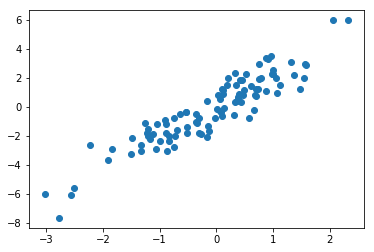

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 0번째 컬럼을 선택
x = data[:, 0]
# 1번째 컬럼을 선택
y = data[:, 1]
plt.scatter(x, y)

In [132]:
# Uniform distribution (0 ~ 99까지의 index 중에서 20개를 임의로 선택)
num_data = x.shape[0]
indices = np.random.choice(num_data, 20, replace=False)
display(indices)

# Fancy indexing
selection = data[indices]

array([30, 32, 94, 66, 97,  9, 43, 61,  2, 19, 93, 98, 20, 73, 83, 16, 64,
       22, 35, 27])

In [136]:
selection

array([[-1.2033623 , -2.04402725],
       [-2.76337717, -7.66760648],
       [ 1.05185885,  1.98418223],
       [-0.14547282, -1.34125678],
       [ 0.09619333, -0.64335574],
       [ 0.0843329 , -0.3543059 ],
       [ 0.37785618,  0.51409383],
       [ 0.7841796 ,  1.97640753],
       [ 0.88151763,  1.12795177],
       [-0.50886808, -1.81099656],
       [-0.83504984, -2.38632016],
       [-0.99658689, -2.35038099],
       [ 1.58115602,  2.86410319],
       [ 0.87475323,  3.400675  ],
       [ 0.74577693,  1.95834451],
       [-3.0236127 , -6.00766046],
       [ 0.13143756, -0.07833855],
       [-0.87753796, -1.15767204],
       [-0.84202629, -2.01226547],
       [-0.74618649, -2.77366681]])

In [134]:
selection[:, 0]

array([-1.2033623 , -2.76337717,  1.05185885, -0.14547282,  0.09619333,
        0.0843329 ,  0.37785618,  0.7841796 ,  0.88151763, -0.50886808,
       -0.83504984, -0.99658689,  1.58115602,  0.87475323,  0.74577693,
       -3.0236127 ,  0.13143756, -0.87753796, -0.84202629, -0.74618649])

In [135]:
selection[:, 1]

array([-2.04402725, -7.66760648,  1.98418223, -1.34125678, -0.64335574,
       -0.3543059 ,  0.51409383,  1.97640753,  1.12795177, -1.81099656,
       -2.38632016, -2.35038099,  2.86410319,  3.400675  ,  1.95834451,
       -6.00766046, -0.07833855, -1.15767204, -2.01226547, -2.77366681])

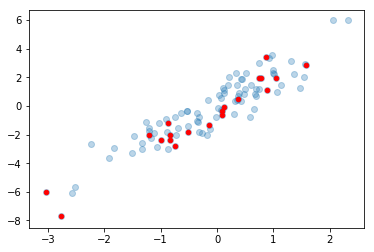

In [133]:
# 선택된 점을 살펴보자.
plt.scatter(x, y, alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='red', s=20)

통계 모델 검증을 위해 훈련/ 테스트 집단을 분할하거나 통계적 질문에 답하기 위해 샘플링 할 때 종종 필요한 데이터를 신속하게 분할하는데 자주 사용된다.

### 팬시 인덱싱으로 값 변경하기

In [137]:
x = np.arange(10)
display(x)

# 변경할 index
idx = np.array([2, 1, 8, 4])

# 팬시 인덱싱을 이용하여 값을 변경
x[idx] = 99

display(x)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [138]:
# 팬시 인덱싱을 이용하여 연산
x[idx] -= 10
display(x)

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [139]:
# 동일한 index에서 반복적으로 값을 업데이트 해주는 법 잘못된 오해
x = np.zeros(10)
display(x)

i = [2, 3, 3, 4, 4, 4]

# 3번 index에서는 값이 2가 되고, 4번 index에서는 값이 3이 될 것 같다. 하지만 결론은 unique하게 처리된다.
x[i] += 1
display(x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [140]:
# 동일한 index에서 반복적으로 값을 업데이트 해주는 법
x = np.zeros(10)
i = [2, 3, 3, 4, 4, 4]

np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

#### 예제 : 데이터 구간화 (1,000개의 값이 있고 그 값들이 어느 구간에 속하는지 빠르게 찾고 싶다.)

In [142]:
np.random.seed(42)

# 표준 정규 분포에서 1000개의 값을 추출한다. Histogram은 정규분포의 형태와 비슷하리라 예측가능하다.
x = np.random.randn(1000)
display(x[:5])

# 20개의 구간 생성
bins = np.linspace(-5, 5, 20)
display(bins)

# 20개의 구간에 속하는 값들의 빈도수를 체크하기 위한 영벡터
counts = np.zeros_like(bins)
display(counts)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337])

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [152]:
# 각 x에 대한 적절한 구간 찾기
i = np.searchsorted(bins, x)
i[:5] # 구간 반환

array([11, 10, 11, 13, 10])

In [153]:
# 각 구간에 1 더하기
np.add.at(counts, i, 1)

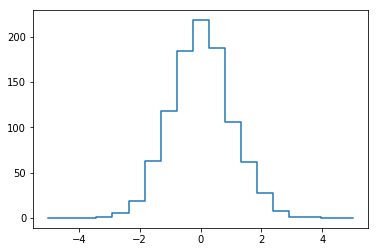

In [154]:
# plotting을 한다.
plt.plot(bins, counts, linestyle='steps')

(array([  0.,   0.,   0.,   1.,   5.,  19.,  63., 118., 184., 218., 187.,
        106.,  62.,  27.,   8.,   1.,   1.,   0.,   0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

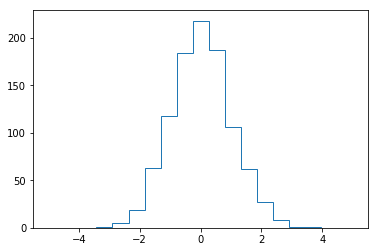

In [155]:
# Tip : hist 함수를 사용하자. 그리고 속력이 더 빠르다!
plt.hist(x, bins, histtype='step', alpha=1)

### 배열 정렬
np.sort

> 기본적으로 퀵 정렬 알고리즘을 사용. merge sort나 heap sort로도 사용 가능.

In [159]:
# 입력값을 수정하지 않고 배열의 정렬 버전을 반환
x = np.array([2, 1, 4, 3, 5])
sorted_x = np.sort(x)

display(x)
display(sorted_x)
x is sorted_x

array([2, 1, 4, 3, 5])

array([1, 2, 3, 4, 5])

False

In [160]:
# in-place 즉 배열을 그 자리에서 정렬
x = np.array([10, 9, 8, 11, 1, 5, 7, 6])
x_sort = x.sort()

display(x)


array([ 1,  5,  6,  7,  8,  9, 10, 11])

>`np.argsort`

>정렬된 요소의 인덱스를 반환

In [164]:
display(x)
x.argsort()

array([ 1,  5,  6,  7,  8,  9, 10, 11])

array([0, 1, 2, 3, 4, 5, 6, 7])

> 행이나 열 기준으로 정렬하기

In [165]:
# 행렬 생성
rand = np.random.RandomState(42)
x = rand.randint(0, 10, (4, 6))

display(x)

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

### 부분 정렬 : 파티션 나누기¶
>전체 배열을 정렬할 필요 없이, 단순히 배열에서 K개의 가장 작은 값을 찾고 싶은 경우

In [166]:
x= np.array([7, 2, 3, 1, 6, 5, 4])

# 배열 내에서 가장 작은 값 3개는 배열의 좌측으로, 나머지 값은 배열의 우측 (두 파티션 내의 요소는 임의의 순서를 가진다.)
np.partition(x, 3) # 정렬은 안됨, 모으기만 함

array([2, 1, 3, 4, 6, 5, 7])

advanced)
> 다차원 배열의 임의의 축을 따라 파티션 나누기

In [167]:
rand = np.random.RandomState(42)
y = rand.randint(0, 10, (4, 6))
y

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

### 구조화된 데이터 : NumPy의 구조화된 배열
* pandas에서 왜 numpy 배열을 사용할까?

In [168]:
# 여러 사람에 대한 다양한 종류의 데이터를 표현하는 방법 - 다소 이해하기 쉽지 않다.
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [169]:
# 복합 데이터 타입을 지정
# U10 : 최대 길이 10일 갖는 유니코드 문자열
# i4 : 4바이트 정수
# f8 : 8바이트 부동 소수점
data = np.zeros(4, dtype = {'names':('name', 'age', 'weight'),
                        'formats':('U10', 'i4', 'f8')})

data

array([('', 0, 0.), ('', 0, 0.), ('', 0, 0.), ('', 0, 0.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [170]:
data['name'] = name
data['age'] = age
data['weight'] = weight

data

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])